<a href="https://colab.research.google.com/github/mhrice/soundsauce/blob/main/MusicGen_Melody_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install -U git+https://github.com/facebookresearch/audiocraft#egg=audiocraft
# !python3 -m pip install -U audiocraft

  Cloning https://github.com/facebookresearch/audiocraft to /tmp/pip-install-mzf_rfr9/audiocraft_96acd4e86bb6443c8796d133df7d3005
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/audiocraft /tmp/pip-install-mzf_rfr9/audiocraft_96acd4e86bb6443c8796d133df7d3005
  Resolved https://github.com/facebookresearch/audiocraft to commit d874966c6cd5b790d7749b332ee5f001817a3ffe
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 9.5 MB/s eta 0:00:00
  Preparing

In [ ]:
from audiocraft.models import musicgen
from audiocraft.utils.notebook import display_audio
from audiocraft.data.audio import audio_write
import torch
import torchaudio
from google.colab import files

In [ ]:
model = musicgen.MusicGen.get_pretrained('melody', device='cuda')

Downloading: "https://dl.fbaipublicfiles.com/demucs/hybrid_transformer/955717e8-8726e21a.th" to /root/.cache/torch/hub/checkpoints/955717e8-8726e21a.th
100%|██████████| 80.2M/80.2M [00:00<00:00, 137MB/s]


In [ ]:
descriptions = ["song balances catchy melodies with a touch of complexity. The song features memorable hooks, both in the guitar parts and the vocal melodies, making it instantly recognizable and easy to sing along to. The heartfelt and personal lyrics contribute to the song's universal appeal and emotional impact."]

In [ ]:
melody, sr = torchaudio.load('/content/asitwas_vocals.wav')

In [ ]:
model.set_generation_params(duration=8)

In [ ]:
wav = model.generate_with_chroma(descriptions, melody[None].expand(1, -1, -1), sr)
display_audio(wav, 32000)
for idx, one_wav in enumerate(wav):
#     # Will save under {idx}.wav, with loudness normalization at -14 db LUFS.
    audio_write(f'/content/{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness")
    files.download(f'/content/{idx}.wav')


CLIPPING /content/0 happening with proba (a bit of clipping is okay): 0.0028320313431322575 maximum scale:  1.5579063892364502


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
########################

In [ ]:
# Text-only
model = musicgen.MusicGen.get_pretrained('melody', device='cuda')

In [ ]:
model.set_generation_params(duration=10)

In [ ]:
descriptions = ["action sequence in movie"]

In [ ]:
wav = model.generate(descriptions)
display_audio(wav, 32000)
# for idx, one_wav in enumerate(wav):
#     # Will save under {idx}.wav, with loudness normalization at -14 db LUFS.
    # audio_write(f'/content/{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness")
    # files.download(f'/content/{idx}.wav')

In [ ]:
# Below is for checking chroma, not needed for generation

In [ ]:
import librosa
import matplotlib.pyplot as plt

In [ ]:
x, sr = librosa.load("/content/test_mid.wav", sr=44100)

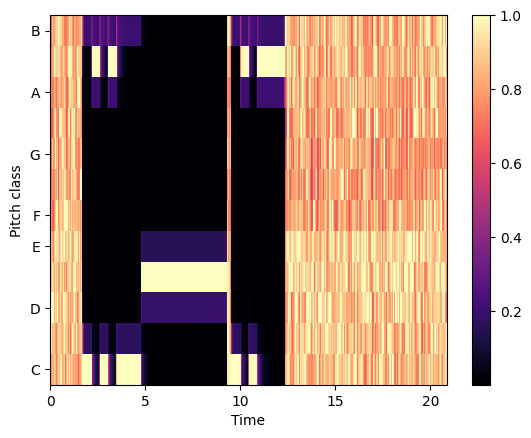

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr,
                                          n_chroma=12, n_fft=4096)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()